In [1]:
import pandas as pd

# Load the full dataset
full_data = pd.read_csv('C:/Users/Alex/Downloads/TR_clean.csv')

# Sample a fraction of the data. For instance, this will sample 5% of the data.
sample_data = full_data.sample(frac=0.05)

# Save the sample to a new CSV file
sample_data.to_csv('C:/Users/Alex/Downloads/TR_clean_sample.csv', index=False)


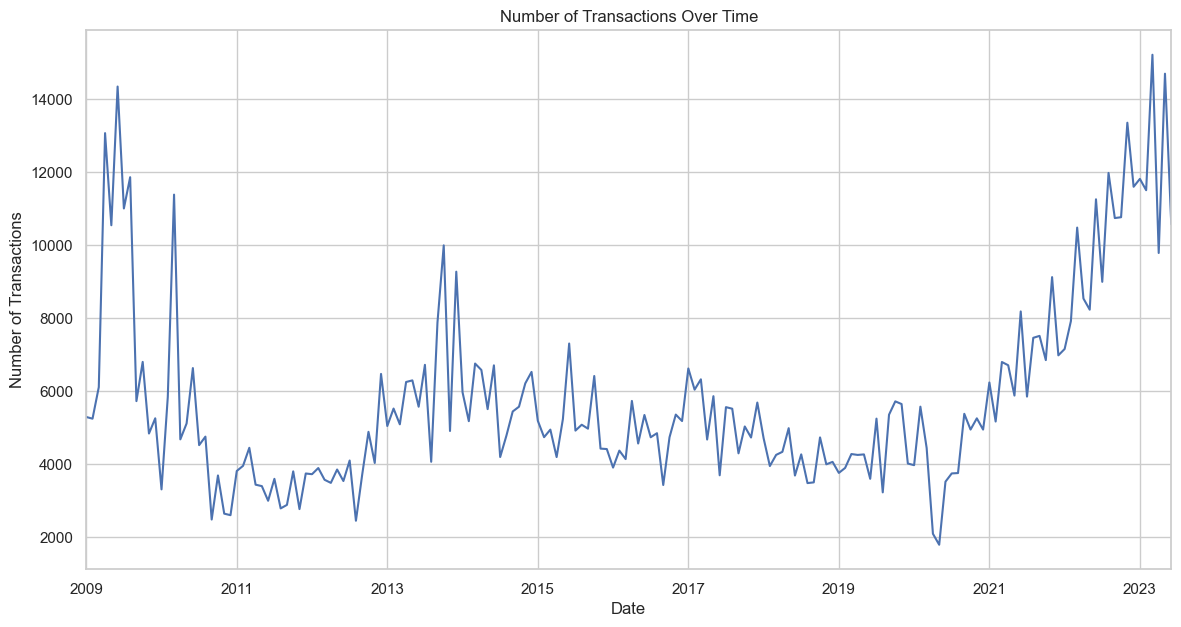

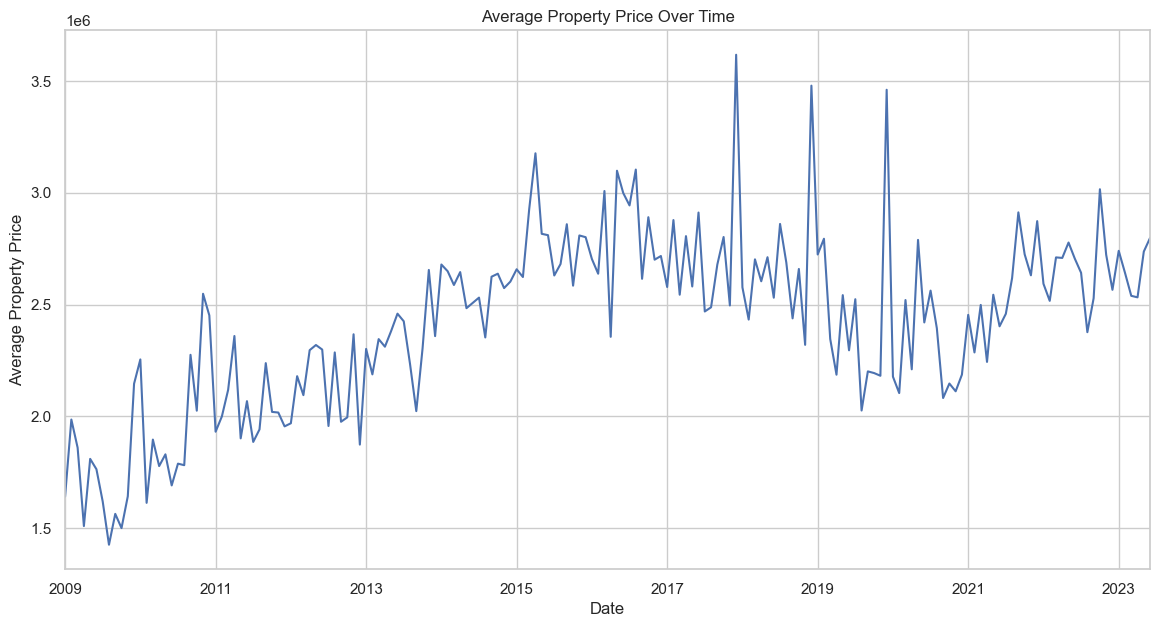

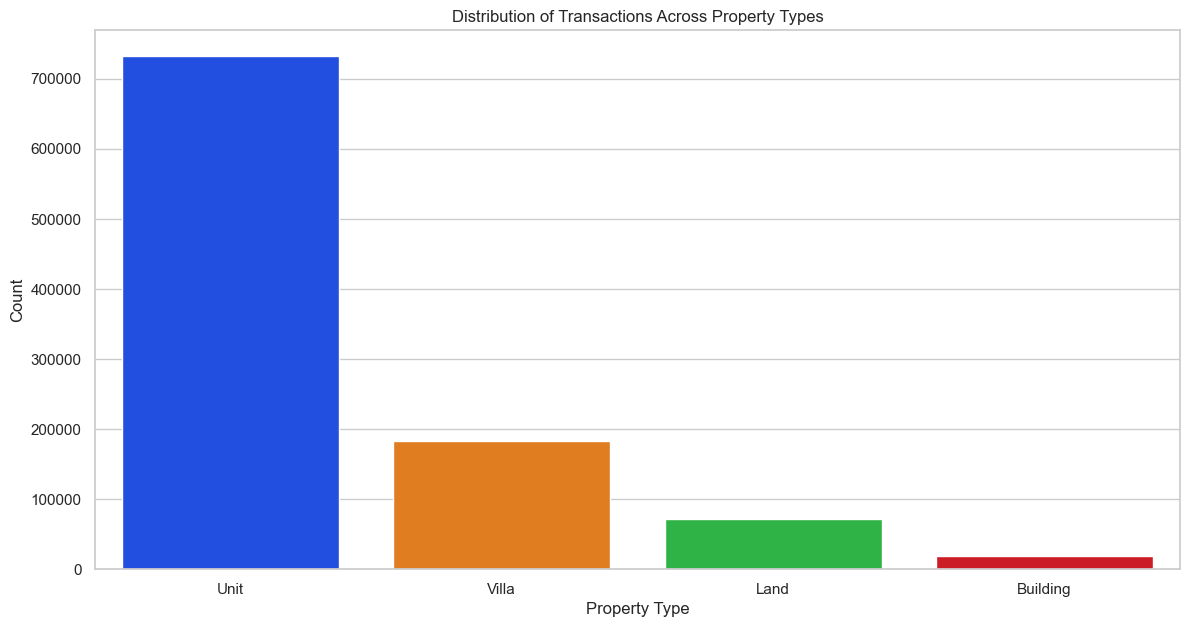

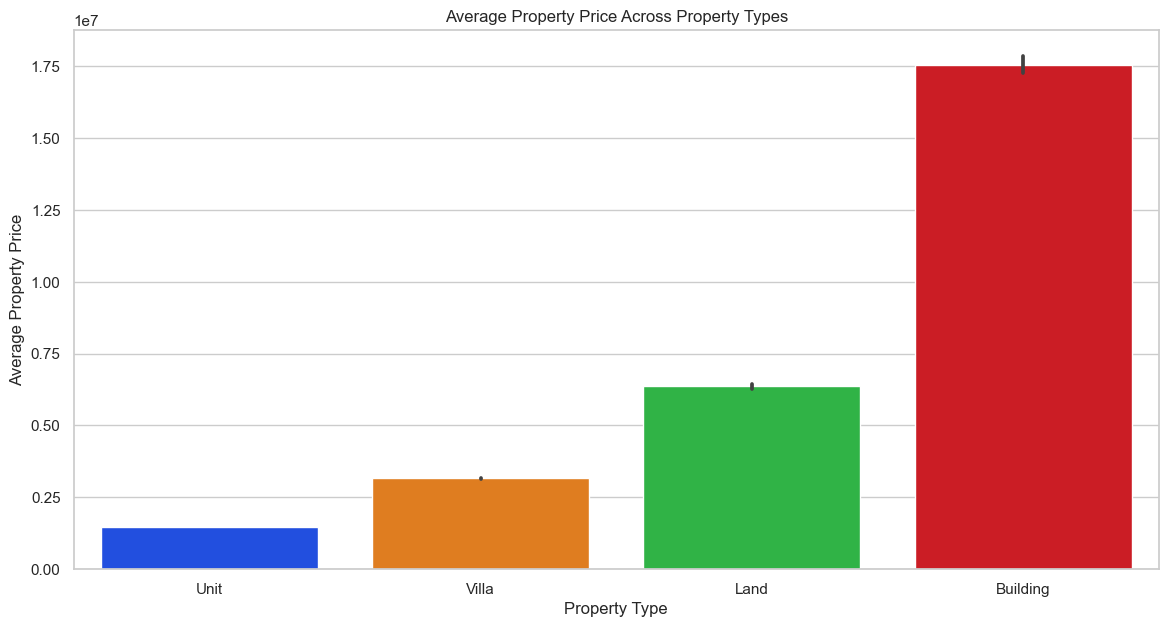

ValueError: Could not interpret input 'community_name_en'

<Figure size 1400x700 with 0 Axes>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting some initial parameters for Seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 10)

# Load the data
data = pd.read_csv('C:/Users/Alex/Downloads/TR_clean.csv')
data['instance_date'] = pd.to_datetime(data['instance_date'])

# Time series analysis
plt.figure(figsize=(14, 7))
data.set_index('instance_date').resample('M')['transaction_id'].count().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(14, 7))
data.set_index('instance_date').resample('M')['actual_worth'].mean().plot()
plt.title('Average Property Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Property Price')
plt.show()

# Property type analysis
plt.figure(figsize=(14, 7))
sns.countplot(x='property_type_en', data=data, palette=palette)
plt.title('Distribution of Transactions Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='property_type_en', y='actual_worth', data=data, palette=palette)
plt.title('Average Property Price Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Average Property Price')
plt.show()

# Location-based analysis
plt.figure(figsize=(14, 7))
sns.barplot(x='community_name_en', y='actual_worth', data=data, palette=palette)
plt.title('Average Property Price by Community')
plt.xlabel('Community')
plt.ylabel('Average Property Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Price distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x="actual_worth", binwidth=50000, palette=palette)
plt.title('Distribution of Property Prices')
plt.xlabel('Property Price')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 7))
correlation = data[['procedure_area', 'actual_worth', 'meter_sale_price', 'rent_value', 'meter_rent_price']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
# Look at the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.info())

# print all different values of the column 'procedure_name_en'
print(data['procedure_name_en'].unique())

     transaction_id  procedure_id  trans_group_id trans_group_en   
0   1-11-2010-15769            11               1          Sales  \
1    1-11-2010-3056            11               1          Sales   
2  1-11-2009-214345            11               1          Sales   
3   1-110-2014-1257           110               1          Sales   
4    2-13-2014-3052            13               2      Mortgages   

           procedure_name_en instance_date  property_type_id property_type_en   
0                       Sell    2010-10-25                 3             Unit  \
1                       Sell    2010-03-10                 3             Unit   
2                       Sell    2009-07-20                 3             Unit   
3  Lease to Own Registration    2014-06-16                 3             Unit   
4      Mortgage Registration    2014-04-14                 4            Villa   

   property_sub_type_id property_sub_type_en  ... procedure_area   
0                  60.0             

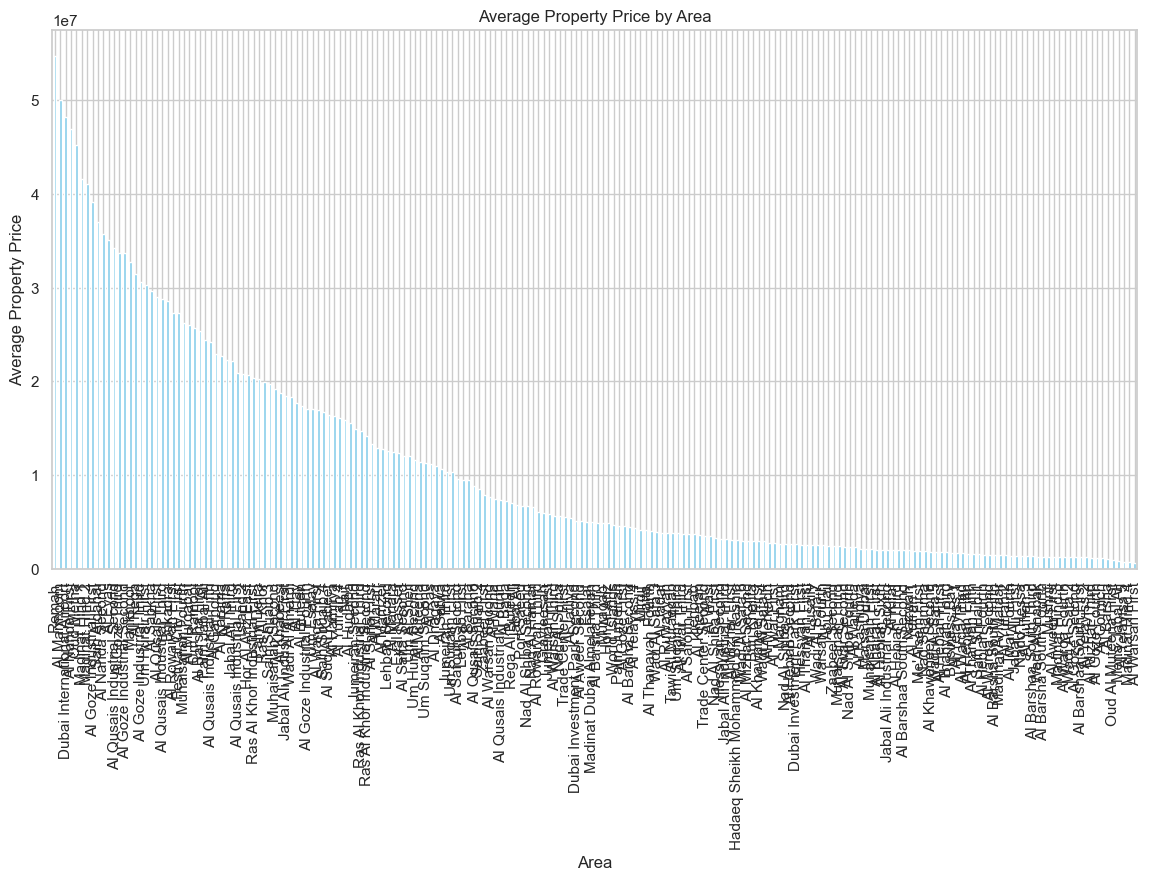

In [4]:
plt.figure(figsize=(14, 7))
data.groupby('area_name_en')['actual_worth'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Property Price by Area')
plt.xlabel('Area')
plt.ylabel('Average Property Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


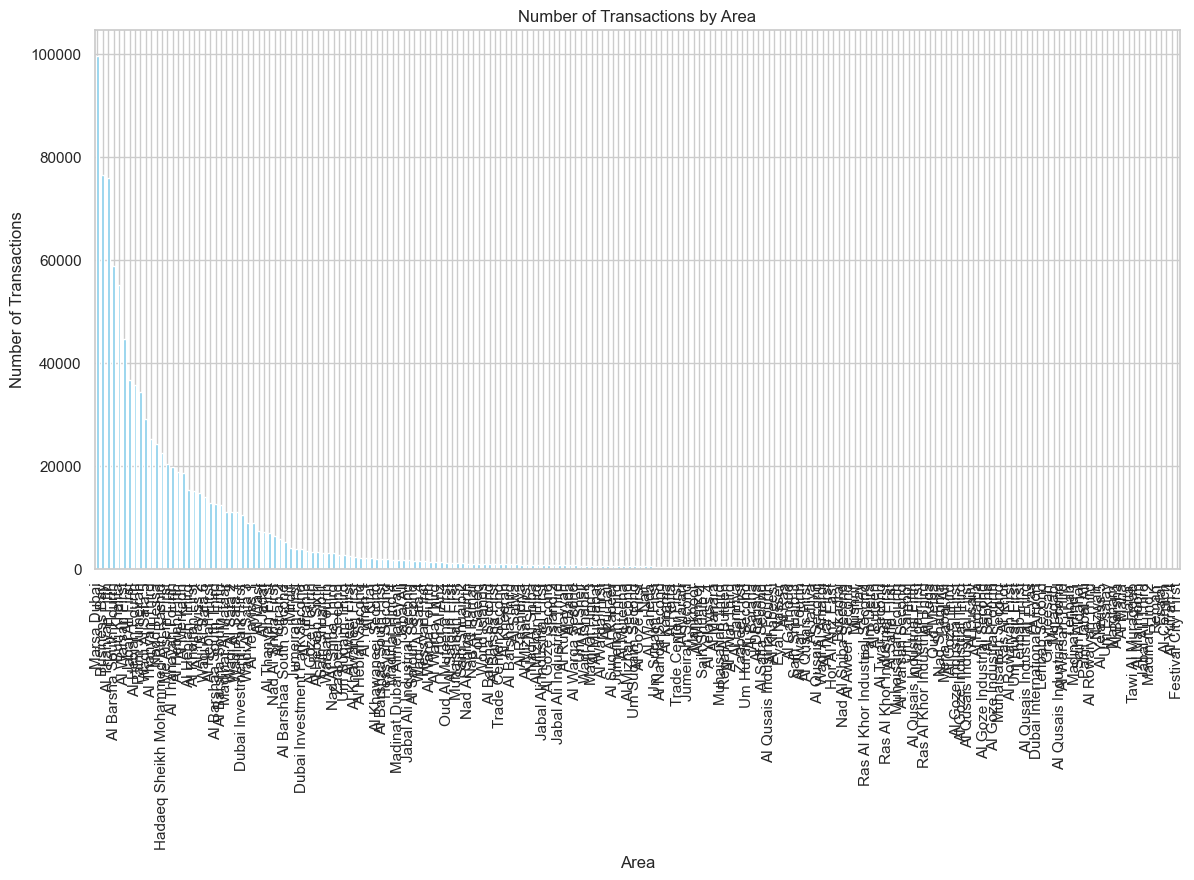

In [5]:
plt.figure(figsize=(14, 7))
data['area_name_en'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Area')
plt.xlabel('Area')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


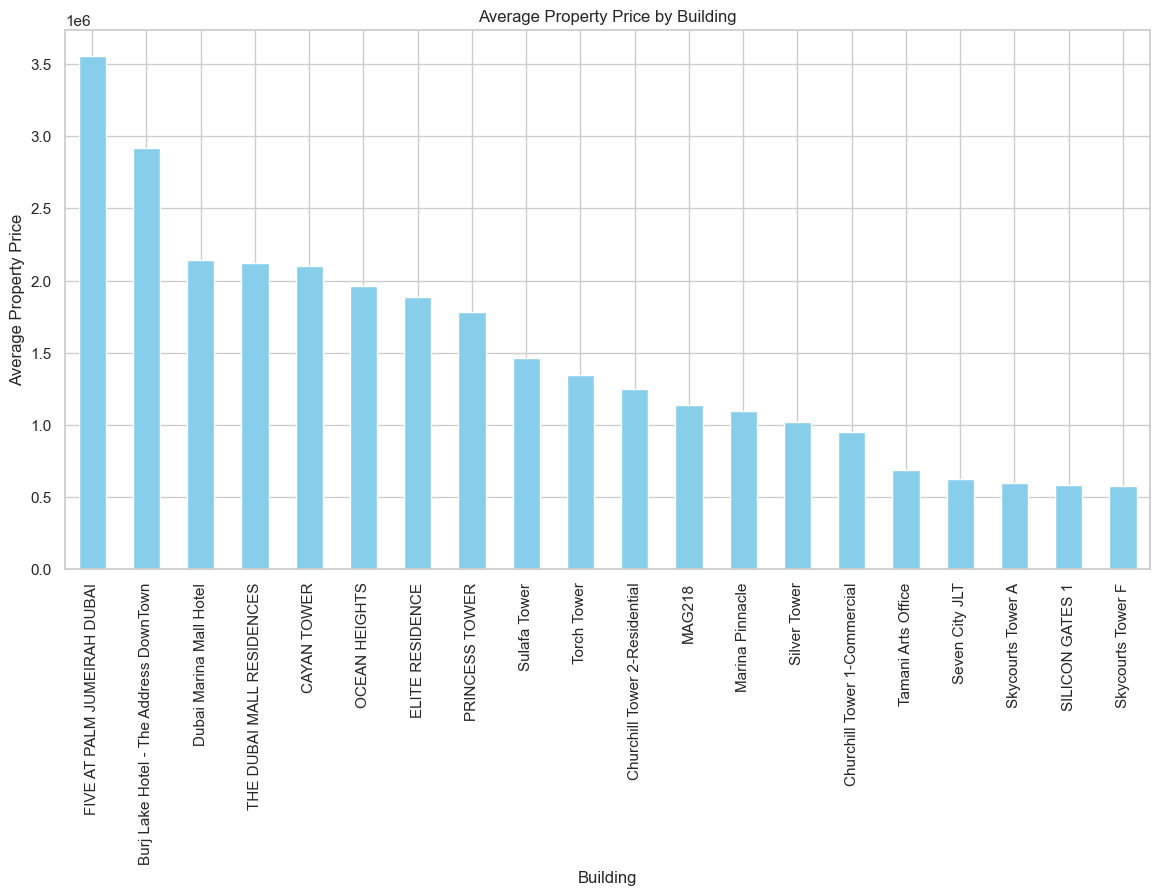

In [6]:
plt.figure(figsize=(14, 7))
top_buildings = data['building_name_en'].value_counts().index[:20]  # Get the top 20 buildings
data[data['building_name_en'].isin(top_buildings)].groupby('building_name_en')['actual_worth'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Property Price by Building')
plt.xlabel('Building')
plt.ylabel('Average Property Price')
plt.xticks(rotation=90)
plt.show()


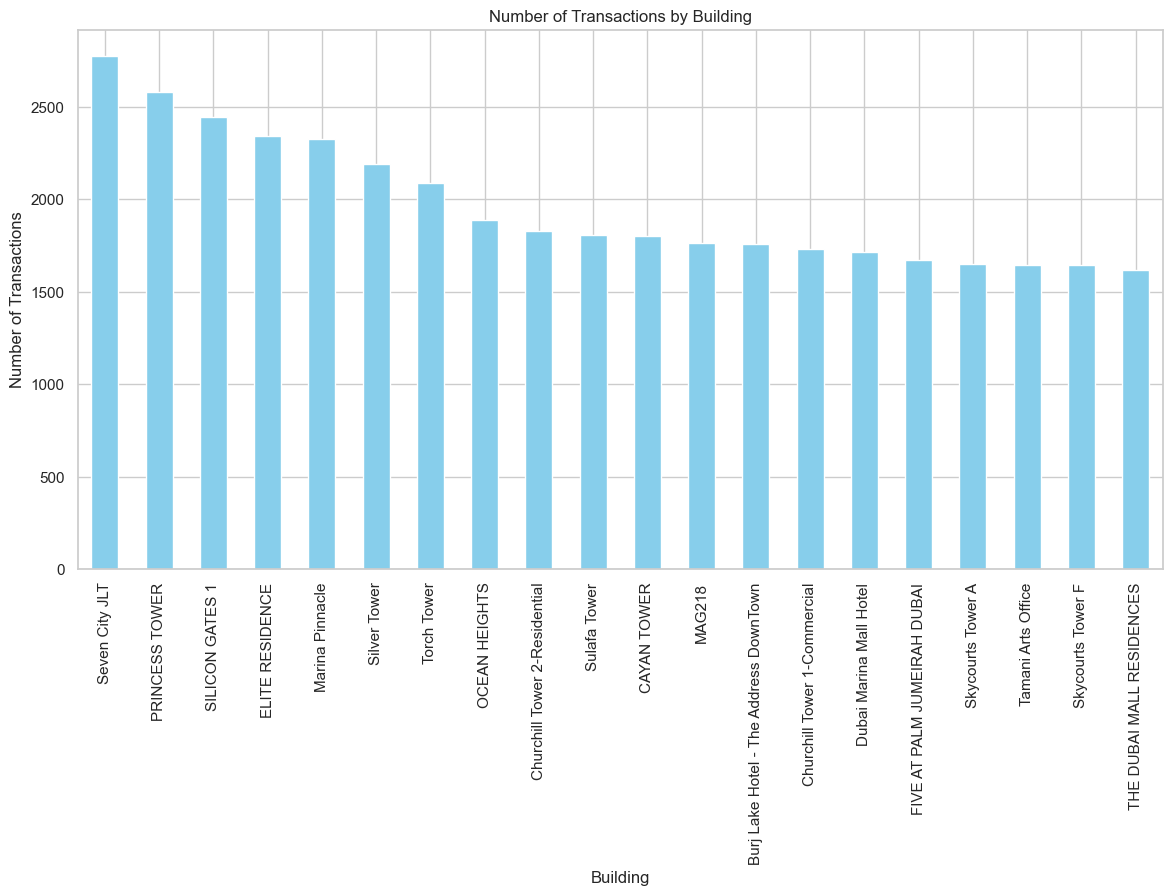

In [7]:
plt.figure(figsize=(14, 7))
data['building_name_en'].value_counts()[:20].plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Building')
plt.xlabel('Building')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


In [11]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

def get_location_by_area(area):
    location = geolocator.geocode(area)
    return (location.latitude, location.longitude)

# Test function
print(get_location_by_area("Dubai Marina, Dubai"))


(25.0786415, 55.1352524)


In [13]:
def get_location_by_area(area):
    location = geolocator.geocode(area)
    if location is None:
        return None
    else:
        return (location.latitude, location.longitude)


In [14]:
# Add a new column with geolocation data
data['geolocation'] = data['area_name_en'].apply(get_location_by_area)


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Marsa+Dubai&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000001EF9B889E40>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd

# Initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")

def get_location_by_area(area):
    location = geolocator.geocode(area)
    if location is None:
        return None
    else:
        return (location.latitude, location.longitude)

# Get a DataFrame of unique areas
unique_areas = pd.DataFrame(data['area_name_en'].unique(), columns=['area_name_en'])

# Fetch geolocation for each unique area
unique_areas['geolocation'] = unique_areas['area_name_en'].apply(get_location_by_area)

# Merge the geolocation data back into the original DataFrame
data = pd.merge(data, unique_areas, on='area_name_en', how='left')


In [ ]:
import folium
from folium.plugins import HeatMap

# Filter out rows with missing geolocation data
data = data.dropna(subset=['geolocation'])

# Create a map centered around Dubai
m = folium.Map(location=[25.2048, 55.2708], zoom_start=10)

# Prepare data
heat_data = [[row['geolocation'][0], row['geolocation'][1], row['actual_worth']] for index, row in data.iterrows()]

# Create a HeatMap and add it to the map
HeatMap(heat_data).add_to(m)

# Save it to a file
m.save('heatmap.html')
